# DS Automation Assignment

Using our prepared churn data from week 2:
- use pycaret to find an ML algorithm that performs best on the data
    - Choose a metric you think is best to use for finding the best model; by default, it is accuracy but it could be AUC, precision, recall, etc. The week 3 FTE has some information on these different metrics.
- save the model to disk
- create a Python script/file/module with a function that takes a pandas dataframe as an input and returns the probability of churn for each row in the dataframe
    - your Python file/function should print out the predictions for new data (new_churn_data.csv)
    - the true values for the new data are [1, 0, 0, 1, 0] if you're interested
- test your Python module and function with the new data, new_churn_data.csv
- write a short summary of the process and results at the end of this notebook
- upload this Jupyter Notebook and Python file to a Github repository, and turn in a link to the repository in the week 5 assignment dropbox

*Optional* challenges:
- return the probability of churn for each new prediction, and the percentile where that prediction is in the distribution of probability predictions from the training dataset (e.g. a high probability of churn like 0.78 might be at the 90th percentile)
- use other autoML packages, such as TPOT, H2O, MLBox, etc, and compare performance and features with pycaret
- create a class in your Python module to hold the functions that you created
- accept user input to specify a file using a tool such as Python's `input()` function, the `click` package for command-line arguments, or a GUI
- Use the unmodified churn data (new_unmodified_churn_data.csv) in your Python script. This will require adding the same preprocessing steps from week 2 since this data is like the original unmodified dataset from week 1.

Initially, I thought I had corrupted my conda and uninstalled/reinstalled. Yeah, that was fun, but it happens. After reinstalling, the sklearn for the confusion matrix threw an error. I looked it up and it's being replaced with sklearn.metrics.ConfusionMatrixDisplay (reference: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn-metrics-confusionmatrixdisplay )

I began the assignment without creating a virtual environment first.  I got most of the way through it, but it kept throwing an error.  Then, I grew a brain and reread the pycaret ipynb, which noted how to check which version of python, etc., you are using.  Yeah, I had to create the virtual.  So, followed the steps that were provided.


In [2]:
!jupyter kernelspec list

Available kernels:
  week5      C:\Users\jenni\AppData\Roaming\jupyter\kernels\week5
  python3    C:\Users\jenni\anaconda3\share\jupyter\kernels\python3


0.01s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


In [1]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

For giggles, I wanted to see how this worked with the prepped data vs the unprepped data.  I also wanted to see if I had to name everything
df or if I could use df2, etc.  That was a face/palm moment, since df is just the alias we give the data frame.  

In [5]:
df = pd.read_csv('C:/Users/jenni/Documents/MSDS600/prepped_churn_data1.csv', index_col='customerID')
df

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,0,0,0,29.85,29.85,0
5575-GNVDE,34,1,1,1,56.95,1889.50,0
3668-QPYBK,2,1,0,1,53.85,108.15,1
7795-CFOCW,45,0,1,2,42.30,1840.75,0
9237-HQITU,2,1,0,0,70.70,151.65,1
...,...,...,...,...,...,...,...
6840-RESVB,24,1,1,1,84.80,1990.50,0
2234-XADUH,72,1,1,3,103.20,7362.90,0
4801-JZAZL,11,0,0,0,29.60,346.45,0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   int64  
 2   Contract        7043 non-null   int64  
 3   PaymentMethod   7043 non-null   int64  
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7043 non-null   float64
 6   Churn           7043 non-null   int64  
dtypes: float64(2), int64(5)
memory usage: 440.2+ KB


In [10]:
df2 = pd.read_csv('C:/Users/jenni/Documents/MSDS600/churn_data(1).csv', index_col='customerID')
df2

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.85,29.85,No
5575-GNVDE,34,Yes,One year,Mailed check,56.95,1889.50,No
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.85,108.15,Yes
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...
6840-RESVB,24,Yes,One year,Mailed check,84.80,1990.50,No
2234-XADUH,72,Yes,One year,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,11,No,Month-to-month,Electronic check,29.60,346.45,No


In [12]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tenure          7043 non-null   int64  
 1   PhoneService    7043 non-null   object 
 2   Contract        7043 non-null   object 
 3   PaymentMethod   7043 non-null   object 
 4   MonthlyCharges  7043 non-null   float64
 5   TotalCharges    7032 non-null   float64
 6   Churn           7043 non-null   object 
dtypes: float64(2), int64(1), object(4)
memory usage: 440.2+ KB


In [14]:
from pycaret.classification import setup, compare_models, predict_model, save_model, load_model, ClassificationExperiment

I combined what Nate had in his FTE and what you (Christy) had into a single statement

In [17]:
automl = ClassificationExperiment()

Since I wanted to see how things were different between the two data sets--for my own weird data freak mind--automl1 is the clean set and
automl is the raw.

In [20]:
automl1 = setup(df, target='Churn')

,Description,Value
0,Session id,6554
1,Target,Churn
2,Target type,Binary
3,Original data shape,"(7043, 7)"
4,Transformed data shape,"(7043, 7)"
5,Transformed train set shape,"(4930, 7)"
6,Transformed test set shape,"(2113, 7)"
7,Numeric features,6
8,Preprocess,True
9,Imputation type,simple


In [22]:
automl = setup(df2, target='Churn')

,Description,Value
0,Session id,2596
1,Target,Churn
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(7043, 7)"
5,Transformed data shape,"(7043, 12)"
6,Transformed train set shape,"(4930, 12)"
7,Transformed test set shape,"(2113, 12)"
8,Ordinal features,1
9,Numeric features,3


In [24]:
best_model1 = automl1.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.7994,0.8380,0.5436,0.6459,0.5898,0.4584,0.4617,0.9870
ridge,Ridge Classifier,0.7980,0.0000,0.4733,0.6692,0.5540,0.4284,0.4394,0.0700
gbc,Gradient Boosting Classifier,0.7953,0.8419,0.5008,0.6512,0.5650,0.4342,0.4414,0.1390
ada,Ada Boost Classifier,0.7941,0.8382,0.5153,0.6393,0.5703,0.4371,0.4417,0.0680
lightgbm,Light Gradient Boosting Machine,0.7933,0.8317,0.5222,0.6359,0.5726,0.4381,0.4424,0.1030
lda,Linear Discriminant Analysis,0.7905,0.8247,0.5115,0.6306,0.5644,0.4284,0.4328,0.0170
rf,Random Forest Classifier,0.7781,0.8117,0.4885,0.6031,0.5388,0.3949,0.3994,0.1700
et,Extra Trees Classifier,0.7714,0.7906,0.4985,0.5821,0.5362,0.3859,0.3884,0.1330
svm,SVM - Linear Kernel,0.7708,0.0000,0.4795,0.5946,0.5173,0.3730,0.3843,0.0830
knn,K Neighbors Classifier,0.7643,0.7488,0.4442,0.5748,0.5001,0.3493,0.3549,0.0320


In [26]:
best_model = automl.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7945,0.8398,0.7945,0.7832,0.7851,0.4306,0.4371,0.1880
ada,Ada Boost Classifier,0.7917,0.8384,0.7917,0.7802,0.7825,0.4244,0.4302,0.1150
lr,Logistic Regression,0.7907,0.8335,0.7907,0.7814,0.7838,0.4315,0.4353,0.1030
ridge,Ridge Classifier,0.7884,0.0000,0.7884,0.7743,0.7756,0.4018,0.4112,0.0550
lda,Linear Discriminant Analysis,0.7872,0.8250,0.7872,0.7773,0.7801,0.4216,0.4251,0.0590
lightgbm,Light Gradient Boosting Machine,0.7866,0.8275,0.7866,0.7770,0.7797,0.4209,0.4245,0.1710
rf,Random Forest Classifier,0.7684,0.8036,0.7684,0.7599,0.7627,0.3795,0.3818,0.2280
knn,K Neighbors Classifier,0.7669,0.7436,0.7669,0.7516,0.7551,0.3497,0.3561,0.0750
et,Extra Trees Classifier,0.7602,0.7811,0.7602,0.7528,0.7556,0.3629,0.3644,0.1870
dt,Decision Tree Classifier,0.7369,0.6642,0.7369,0.7378,0.7368,0.3258,0.3265,0.0520


First thing of note:  the clean set best model is the Logistical Regression, while the raw is the Gradient Boosting Classifer. 
I'll need to read up some more on what exactly the Gradient Boosting Classifier is, since it's new.  Between the two 'best' model charts
the top 3 are the same with variances in the accuracy score.  I did notice that with the raw set, the accuracy is much lower than on the clean set 
the further down in the list we get.  

In [29]:
df2.iloc[-2:-1].shape

(1, 7)

In [31]:
df.iloc[-2:-1].shape

(1, 7)

In [33]:
predict_model(best_model, df2.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.400002,306.600006,Yes,Yes,0.5851


predict_model(best_model1, df.iloc[-2:-1])
At this point in my 'experiment' to see how the prediction models act with scrubbed vs raw, the predict_model failed.  

In [36]:
best_model

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=2596, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [38]:
automl.evaluate_model(best_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

I'm guessing that this gives me the types of plots I have access to with the GBC

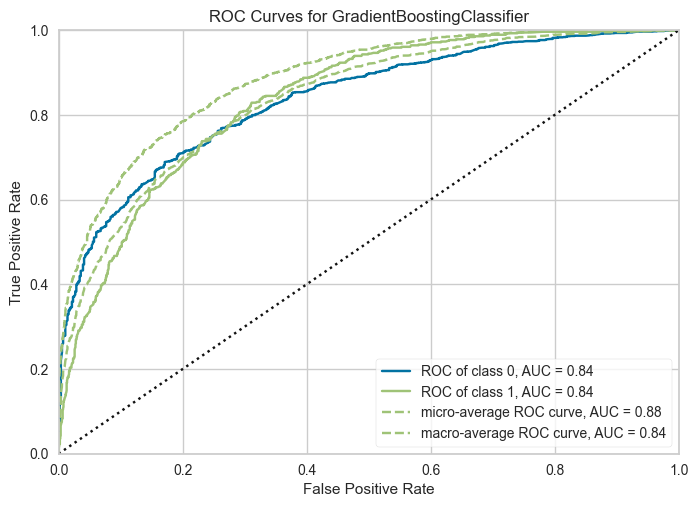

In [41]:
automl.plot_model(best_model)

I need to get better at reading the charts like this

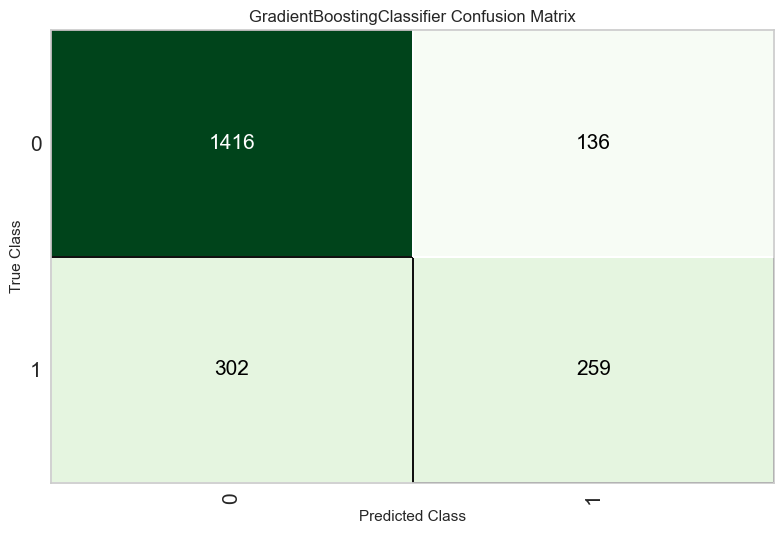

In [44]:
automl.plot_model(best_model, plot = 'confusion_matrix')

 we have our True Negatives at 1416
    Our Tue Positives at 259 (lower right)
    Our False negative is 302 (we predicted 0 and it was a 1)
    Our False Postive is 136 If I use the recall of (TPR = TP / (TP + FN): tpr=1416/(1416+302) or .82 (or 708/859). So the true positive rate is 82%.


In [50]:
automl.predict_model(best_model, df2.iloc[-2:-1])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,1.0000,0,1.0000,1.0000,1.0000,nan,0.0000


,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.400002,306.600006,Yes,Yes,0.5851


In [52]:
predictions = automl.predict_model(best_model, data=df2)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8119,0.8646,0.8119,0.8020,0.8020,0.4737,0.4828


In [54]:
predictions.head()

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
7590-VHVEG,1,No,Month-to-month,Electronic check,29.850000,29.850000,No,Yes,0.7016
5575-GNVDE,34,Yes,One year,Mailed check,56.950001,1889.500000,No,No,0.9577
3668-QPYBK,2,Yes,Month-to-month,Mailed check,53.849998,108.150002,Yes,No,0.6155
7795-CFOCW,45,No,One year,Bank transfer (automatic),42.299999,1840.750000,No,No,0.9491
9237-HQITU,2,Yes,Month-to-month,Electronic check,70.699997,151.649994,Yes,Yes,0.6496


In [56]:
automl.save_model(best_model, 'pycaret_model_js')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['tenure', 'MonthlyCharges',
                                              'TotalCharges'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,...
                                             criterion='friedman_mse', init=None,
                                             learning_rate=0.1, loss='log_loss',
                                             max_

In [58]:
new_pycaret = ClassificationExperiment()

In [60]:
new_pycaret = ClassificationExperiment()
loaded_model = new_pycaret.load_model('pycaret_model_js')

Transformation Pipeline and Model Successfully Loaded


In [62]:
new_pycaret.predict_model(loaded_model, df2.iloc[-2:-1])

,tenure,PhoneService,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,prediction_label,prediction_score
customerID,,,,,,,,,
8361-LTMKD,4,Yes,Month-to-month,Mailed check,74.400002,306.600006,Yes,Yes,0.5851


In [64]:
from IPython.display import Code

Code('predict_churn_js.py')

import pandas as pd
from pycaret.classification import predict_model, load_model

def load_data(filepath):
 
    df = pd.read_csv('C:/Users/jenni/Documents/MSDS600/churn_data(1).csv', index_col='customerID')
    return df


def make_predictions(df):
   
    model = load_model('pycaret_model_js')
    predictions = predict_model(model, data=df)
    predictions.rename({'Label': 'Churn_prediction'}, axis=1, inplace=True)
    
    return predictions['Churn']


if __name__ == "__main__":
    df = load_data('C:/Users/jenni/Documents/MSDS600/churn_data(1).csv')
    predictions = make_predictions(df)
    print('predictions:')
    print(predictions)

This part of the assignment really gave me fits.  Not because it was difficult, but because I can be a dingbat at times.  
I wasn't grasping that I needed to create the file with the information above.  Serious face/palm moment.  

In [67]:
%run predict_churn_js.py

Transformation Pipeline and Model Successfully Loaded


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8119,0.8646,0.8119,0.8020,0.8020,0.4737,0.4828


predictions:
customerID
7590-VHVEG     No
5575-GNVDE     No
3668-QPYBK    Yes
7795-CFOCW     No
9237-HQITU    Yes
             ... 
6840-RESVB     No
2234-XADUH     No
4801-JZAZL     No
8361-LTMKD    Yes
3186-AJIEK     No
Name: Churn, Length: 7043, dtype: category
Categories (2, object): ['No', 'Yes']


<Figure size 800x550 with 0 Axes>

# Summary

To get to this point, I followed both Nate's FTE and Christy's FTE.  There are some things that I was curious about (the way the autoML would 
handle the scrubbed data vs the raw).  I found it interesting that the autoML had a higher accuracy rate than the cleaned data.  

It did take me a bit to figure out I needed to create the .py file on my own and the right way to do that.  Sometimes, I can complicate things
more than I should!  Remembering the KISS principle isn't always easy.  

The confusion plot run against the model indicates that it will be 82% accurate in predicting client churn.